<a href="https://colab.research.google.com/github/robinsinurat/SLO/blob/main/RobinSinurat_LDA_SLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/SLO-main

/content/drive/MyDrive/Colab Notebooks/SLO-main


In [3]:
import numpy as np
import pandas as pd

#baca dataset
dataset = pd.read_csv('data_cancer.csv')

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataset.shape

(569, 33)

In [6]:
#Melihat nilai NaN berada di kolom berapa saja (dihapus karena NaN merupakan representasi data umum yang hilang)
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#Menghapus Kolom yang memiliki Nilai NaN
dataset = dataset.drop(columns=['Unnamed: 32'])

In [8]:
#Menghapus Kolom yang memiliki fitur id karena tidak kepakai
dataset = dataset.drop(columns=['id'])

In [9]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
dataset.shape

(569, 31)

In [11]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [12]:
x = dataset.iloc[:,1:].values
x.shape


(569, 30)

In [13]:
y = dataset.loc[:,['diagnosis']].values
y.shape

(569, 1)

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=5)
y_kmeans1 = kmeans1.fit_predict(x)
print(y_kmeans1)

[1 1 1 2 1 0 1 0 0 0 4 4 4 0 0 0 4 4 1 0 0 2 0 3 1 4 0 4 4 4 1 0 4 1 4 4 0
 2 0 0 0 2 1 0 0 1 2 0 2 0 2 0 2 4 0 2 1 0 0 2 2 2 0 2 0 0 2 2 2 2 1 2 1 0
 2 4 0 1 1 0 2 0 3 4 2 1 0 1 2 0 0 0 0 0 0 1 2 2 2 0 0 2 2 2 2 0 2 2 1 2 2
 2 0 2 2 2 2 4 4 4 2 1 1 0 0 0 0 1 0 1 2 4 4 0 1 0 2 2 0 2 2 4 2 0 2 2 2 0
 0 0 0 2 2 2 0 2 4 4 2 2 2 1 1 2 3 0 2 4 1 0 2 0 4 2 2 2 2 4 0 2 3 1 4 2 0
 2 4 2 2 2 0 2 2 0 0 2 0 4 1 0 2 4 1 4 0 0 2 4 0 0 1 2 3 4 0 0 2 2 1 1 0 0
 2 4 0 0 2 0 0 0 4 2 2 1 2 0 3 1 0 4 0 2 2 0 4 2 0 0 2 2 1 2 1 4 1 0 1 0 4
 4 1 4 4 0 4 3 2 0 2 2 0 2 1 2 4 2 2 4 0 0 1 2 1 4 2 2 2 2 2 2 0 0 2 2 2 0
 2 2 0 2 1 2 1 2 2 2 0 2 0 0 2 0 0 2 2 2 2 4 2 2 2 1 2 1 2 2 0 2 4 4 4 0 2
 2 2 4 2 1 2 3 0 2 2 1 2 2 2 0 2 2 2 0 3 4 2 2 2 0 2 2 2 0 2 4 0 1 1 2 3 1
 4 0 1 1 0 0 2 0 0 2 2 2 2 2 0 0 2 0 2 4 2 2 4 1 2 0 0 2 2 2 4 2 0 2 2 2 0
 0 4 2 2 2 2 0 0 2 2 1 2 2 2 0 2 0 2 2 2 2 2 2 0 2 1 1 0 0 0 0 0 0 2 4 0 2
 4 2 4 0 0 1 2 4 2 0 0 0 2 0 0 2 1 3 0 2 0 0 0 2 4 2 2 2 0 2 2 2 0 0 2 0 2
 0 0 0 0 2 0 1 2 4 2 4 4 

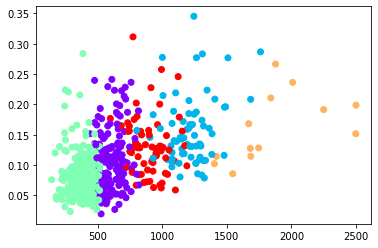

In [16]:
plt.scatter(x[:,3], x[:,5], c=y_kmeans1, cmap='rainbow')

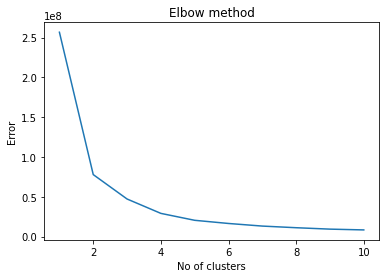

In [17]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [18]:
kmeans2 = KMeans(n_clusters=4)
y_kmeans2 = kmeans.fit_predict(x)
print(y_kmeans2)

[7 7 1 0 1 4 1 4 4 4 8 3 3 8 4 8 8 3 7 4 0 6 8 5 7 3 8 3 3 3 1 4 3 1 3 3 4
 0 4 4 4 0 1 4 4 1 6 4 0 4 0 4 0 3 8 0 7 8 0 6 6 6 8 6 4 8 6 0 6 0 1 6 1 4
 0 3 0 1 1 0 0 0 5 3 0 1 4 1 0 4 4 4 4 4 8 1 0 6 0 4 4 6 0 6 6 4 0 0 5 0 6
 0 4 6 6 0 6 8 3 3 0 1 5 4 0 4 4 1 4 1 0 8 3 8 1 0 0 0 8 6 6 3 0 0 6 0 0 4
 4 4 0 6 6 6 4 0 3 8 0 0 0 1 7 0 5 4 6 3 1 4 0 8 8 6 6 6 6 8 0 0 9 7 3 0 8
 6 3 0 0 0 4 0 6 4 4 0 4 3 1 8 0 3 5 8 0 8 6 3 0 8 1 0 5 8 4 4 0 6 7 7 4 4
 6 8 4 4 6 4 0 4 3 0 0 7 6 4 9 1 4 3 4 0 0 4 1 6 0 0 6 0 7 0 7 3 7 4 7 8 3
 8 1 3 3 8 3 9 6 4 0 6 4 0 5 6 3 0 0 3 4 4 1 0 1 8 0 0 0 0 6 0 4 4 0 0 0 4
 6 0 4 6 7 0 1 6 0 0 0 6 4 4 0 4 0 0 6 0 0 3 6 0 6 1 0 7 0 0 4 0 8 8 8 0 6
 0 0 3 0 1 6 9 4 6 6 1 0 6 0 8 0 0 0 8 9 8 0 0 0 4 6 6 0 0 0 8 4 1 1 0 9 7
 3 4 1 7 4 8 6 4 4 0 0 6 0 0 0 4 0 4 0 3 6 6 3 7 0 4 4 0 0 0 3 0 0 0 0 0 8
 0 3 0 0 0 6 8 8 0 6 1 0 0 0 4 0 4 6 6 6 0 6 0 4 0 1 1 4 4 0 4 4 4 0 3 4 6
 3 0 3 4 4 7 0 1 0 4 0 4 0 0 0 6 1 2 4 0 4 4 4 6 3 0 6 0 8 0 6 0 4 4 0 8 0
 4 4 4 8 0 4 1 0 8 0 3 3 

In [28]:
y_kmeans2.shape

(569,)

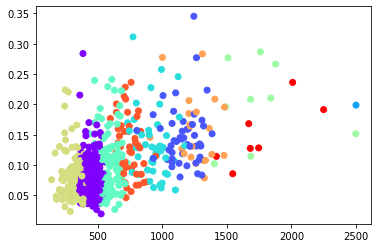

In [19]:
plt.scatter(x[:,3], x[:,5], c=y_kmeans2, cmap='rainbow')

In [33]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
principalComponents = lda.fit_transform(x,y_kmeans2)
principaldataset = pd.DataFrame(data = principalComponents
                                , columns = ['principal component','principal component2'])
principaldataset.head()

,principal component,principal component2
0,14.501942,0.230454
1,15.176236,0.391557
2,11.318083,-0.946760
3,-3.440956,-0.692343
4,10.278229,-1.585674


In [37]:
x.shape

(569, 30)

In [40]:
pd_y = pd.DataFrame(y, columns = ['diagnosis'])
pd_y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [41]:
pd_y.shape

(569, 1)

In [42]:
principaldataset.shape

(569, 2)

In [43]:
principalComponents.shape

(569, 2)

In [44]:
Finaldataset = pd.concat([principaldataset, dataset[['diagnosis']]],axis = 1)
Finaldataset.head()

,principal component,principal component2,diagnosis
0,14.501942,0.230454,M
1,15.176236,0.391557,M
2,11.318083,-0.946760,M
3,-3.440956,-0.692343,M
4,10.278229,-1.585674,M


In [45]:
Finaldataset.shape

(569, 3)

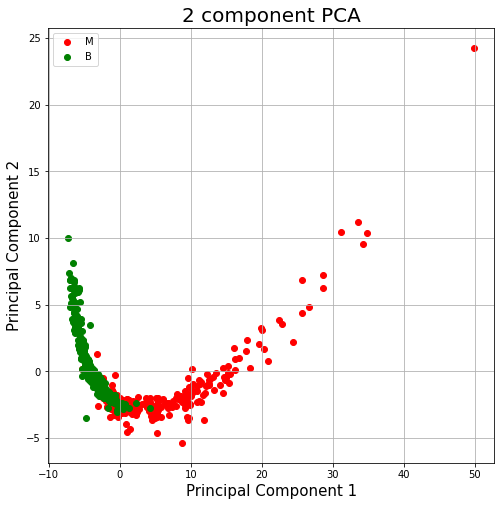

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
diagnosiss = ['M', 'B']
colors = ['r', 'g']
for diagnosis, color in zip(diagnosiss,colors):
    indicesToKeep = Finaldataset['diagnosis'] == diagnosis
    ax.scatter(Finaldataset.loc[indicesToKeep, 'principal component']
               , Finaldataset.loc[indicesToKeep, 'principal component2']
               , c = color)
ax.legend(diagnosiss)
ax.grid()

In [35]:
# Split to train dan test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 0)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix
#dt = DecisionTreeClassifier()
#dt.fit(x_train, y_train)
#y_pred = dt.predict(x_test)
#confusion_matrix(y_test, y_pred)

array([[98, 10],
       [ 3, 60]])

In [ ]:
# Neural Netwrok
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier()
mlp.fit(x_train, y_train)
#y_pred = dt.predict(x_test)
predictions = mlp.predict(x_test)

import itertools
cnf_matrix = confusion_matrix(y_test, predictions)
#print(classification_report(y_train,predictions))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
